<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [23]:
#EDA
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
 14  AGE_GROUP   506 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 59.4+ KB


In [24]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

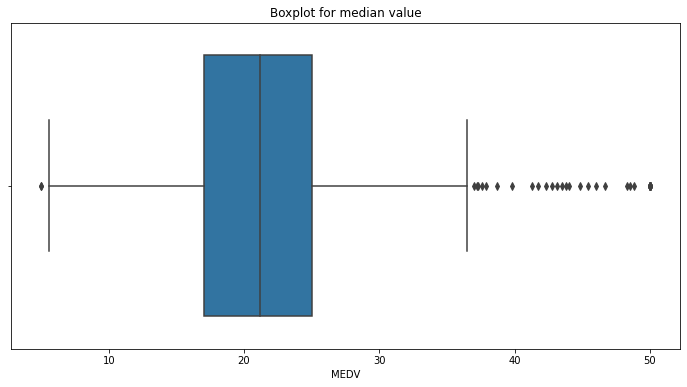

In [28]:
#For the "Median value of owner-occupied homes" provide a boxplot
plt.figure(figsize=(12,6))
sns.boxplot(boston_df, x='MEDV')
plt.title("Boxplot for median value")
plt.show()

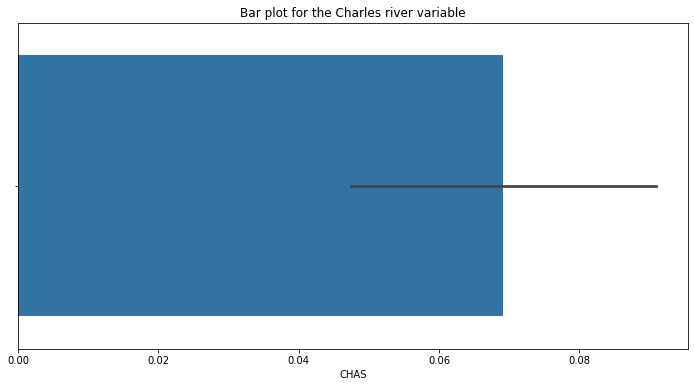

In [29]:
#Provide a  bar plot for the Charles river variable
plt.figure(figsize=(12,6))
sns.barplot(boston_df, x='CHAS')
plt.title("Bar plot for the Charles river variable")
plt.show()

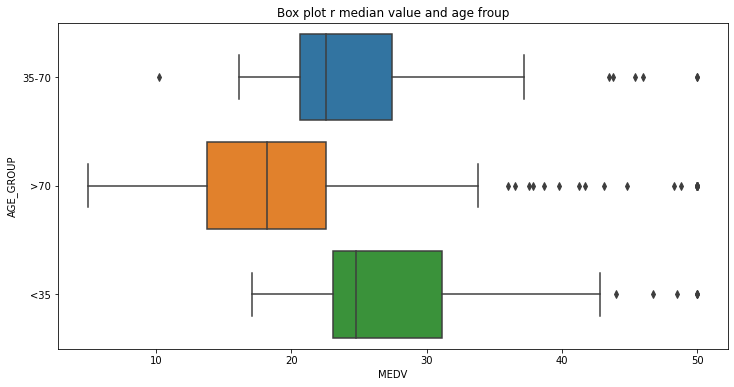

In [30]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['AGE_GROUP'] = np.where(boston_df['AGE']>35, np.where(boston_df['AGE']>70, '>70', '35-70'), '<35')
plt.figure(figsize=(12,6))
sns.boxplot(boston_df, x='MEDV', y='AGE_GROUP')
plt.title("Box plot r median value and age froup")
plt.show()

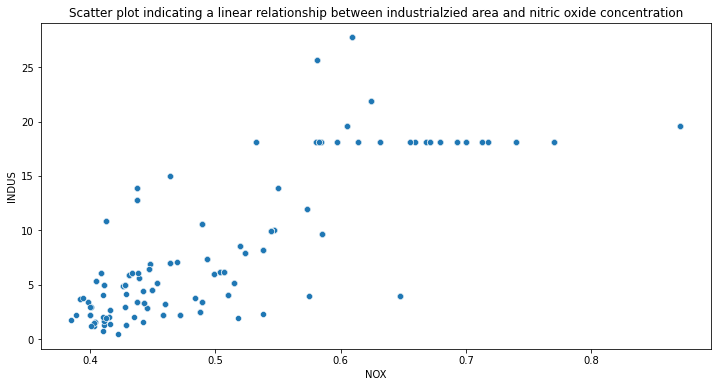

In [31]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
#What can you say about the relationship?
plt.figure(figsize=(12,6))
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')
plt.title("Scatter plot indicating a linear relationship between industrialzied area and nitric oxide concentration")
plt.show()

# COMMENT: In the areas of lower industrialization, the NOX concentration is lower


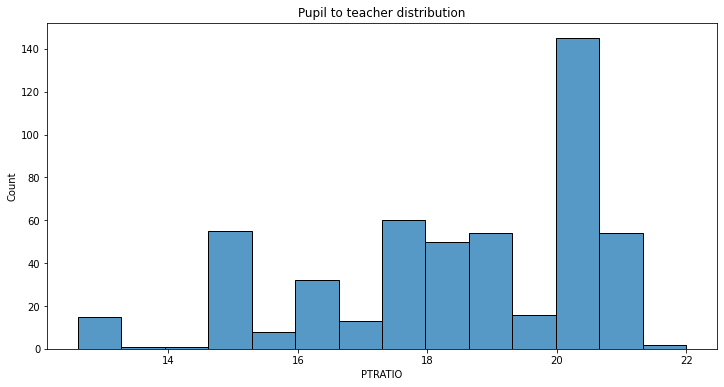

In [32]:
#Create a histogram for the pupil to teacher ratio variable
plt.figure(figsize=(12,6))
sns.histplot(data=boston_df, x='PTRATIO')
plt.title("Pupil to teacher distribution")
plt.show()

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

In [13]:
boston_df.head(3)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35-70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,>70
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35-70


In [33]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
median_by_the_river = boston_df['MEDV'].loc[boston_df['CHAS']==1]
median_NOT_by_the_river = boston_df['MEDV'].loc[boston_df['CHAS']==0]

"""
    H0 hypothesis is that the average median vlaues of these two groups are the same,
    H1 hypothesis is that the average median values of these two groups are NOT the same

"""

from scipy.stats import median_test
res = median_test(median_by_the_river, median_NOT_by_the_river)
res

#COMMENT: We reject null hypothesis, therefore there IS a diference in the median value

MedianTestResult(statistic=8.271903391340615, pvalue=0.004026327394058504, median=21.2, table=array([[ 26, 224],
       [  9, 247]], dtype=int64))

In [ ]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
low = boston_df['MEDV'].loc[boston_df['AGE_GROUP']=='<35']
mid = boston_df['MEDV'].loc[boston_df['AGE_GROUP']=='35-70']
hi = boston_df['MEDV'].loc[boston_df['AGE_GROUP']=='>70']

"""
    H0 hypothesis is that there is NO difference in median value of a house related to the age group
    H1 hypothesis is that there is a difference in median value of a house related to the age group

"""

f_stats, p_value = scipy.stats.f_oneway(low,mid,hi,axis=0)
f_stats, p_value 

#COMMENT: There IS a statistical significancy when it comes to the age group and the median value of the household

(36.40764999196599, 1.7105011022702984e-15)

In [ ]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
# (Pearson Correlation)
pearson,p_value = scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])
pearson,p_value

#COMMENT:There is a relationship between these two values, scatter plot below also indicates that

(0.7636514469209157, 7.913361061233745e-98)

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

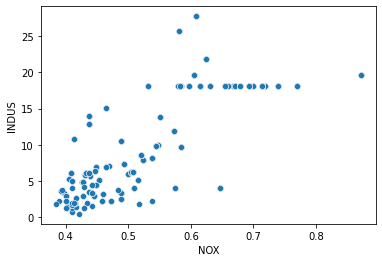

In [22]:
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')